In [1]:
import time
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import layers

In [4]:
start = time.time()
image_data = []
image_labels = []
total_classes = 43
height = 32
width = 32
channels = 3
input_path = '/kaggle/input/gtsrb-german-traffic-sign/'

for i in range(total_classes):
    path = input_path + 'Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
end = time.time()
print("It has taken", round(end-start,5), "seconds")

/kaggle/input/gtsrb-german-traffic-sign/Train/0
/kaggle/input/gtsrb-german-traffic-sign/Train/1
/kaggle/input/gtsrb-german-traffic-sign/Train/2
/kaggle/input/gtsrb-german-traffic-sign/Train/3
/kaggle/input/gtsrb-german-traffic-sign/Train/4
/kaggle/input/gtsrb-german-traffic-sign/Train/5
/kaggle/input/gtsrb-german-traffic-sign/Train/6
/kaggle/input/gtsrb-german-traffic-sign/Train/7
/kaggle/input/gtsrb-german-traffic-sign/Train/8
/kaggle/input/gtsrb-german-traffic-sign/Train/9
/kaggle/input/gtsrb-german-traffic-sign/Train/10
/kaggle/input/gtsrb-german-traffic-sign/Train/11
/kaggle/input/gtsrb-german-traffic-sign/Train/12
/kaggle/input/gtsrb-german-traffic-sign/Train/13
/kaggle/input/gtsrb-german-traffic-sign/Train/14
/kaggle/input/gtsrb-german-traffic-sign/Train/15
/kaggle/input/gtsrb-german-traffic-sign/Train/16
/kaggle/input/gtsrb-german-traffic-sign/Train/17
/kaggle/input/gtsrb-german-traffic-sign/Train/18
/kaggle/input/gtsrb-german-traffic-sign/Train/19
/kaggle/input/gtsrb-german-tra

In [5]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)


X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [7]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [8]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='tanh', input_shape=(height,width,channels)),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=43, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_valid, y_valid))

ValueError: Data cardinality is ambiguous:
  x sizes: 31367
  y sizes: 62734
Please provide data which shares the same first dimension.

In [48]:
model.save("/kaggle/working/lenet.h5")

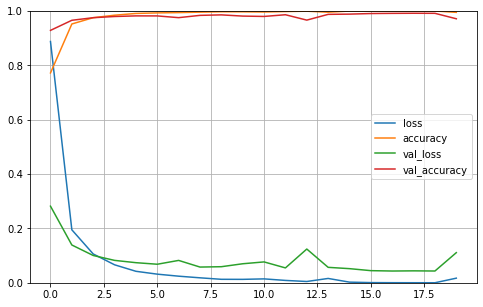

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [14]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
start = time.time()
test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 32, 32, 3)
11


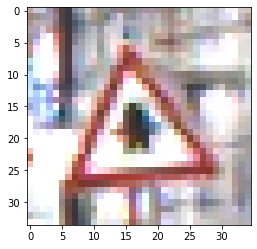

In [15]:
img_index = 25
image = Image.open('/kaggle/input/gtsrb-german-traffic-sign/' + test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
print(img.shape)
print(labels[img_index])
plt.imshow(image)

In [16]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [17]:
pred = model.predict_classes(img)[0]
print(pred)
sign = classes[pred]
print(sign)

11
Right-of-way at intersection


In [18]:
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    #test_imgs.append(img_path)
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("It has taken", round(end-start,5), "seconds")

0.8978622327790974
It has taken 118.72314 seconds


In [19]:
X_test.shape

(12630, 32, 32, 3)

In [21]:
#adversial training
loss_object = tf.keras.losses.CategoricalCrossentropy()
def create_adversarial_pattern(input_image, input_label,eps):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    adversary = (input_image + (signed_grad * eps)).numpy()
    return adversary 

In [22]:
y_test_pred=[]
x_test_pred=[]
for i in range(0,len(X_valid)):
    img = tf. convert_to_tensor(X_valid[i])
    img= tf.reshape(img,(1,32, 32, 3))
    j = y_valid[i]
    j = tf.reshape(j,(1, 43))
    x_test_per=create_adversarial_pattern(img,j,0.53)
    x_test_pred.append(x_test_per)
    pred = model.predict(x_test_per)
    y_test_pred.append(pred)

In [52]:
y_valid[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_test_pred1=[]
x_test_pred1=[]
for i in range(0,len(X_train)):
    img = tf. convert_to_tensor(X_train[i])
    img= tf.reshape(img,(1,32, 32, 3))
    j = y_train[i]
    j = tf.reshape(j,(1, 43))
    x_test_per=create_adversarial_pattern(img,j,0.53)
    x_test_pred1.append(x_test_per)
    pred = model.predict(x_test_per)
    y_test_pred1.append(pred)

In [24]:
x_test_pred=np.reshape(x_test_pred, (len(y_valid),32, 32, 3))

In [25]:
x_test_pred1=np.reshape(x_test_pred1, (len(X_train),32, 32, 3))

In [33]:
#evaluating the model
score = model.evaluate(x_test_pred,y_valid, verbose = 0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  0.45278581976890564
test accuracy:  0.9094618558883667


In [31]:
x_test_pred1=np.concatenate((X_train,x_test_pred1),axis=0)
x_test_pred=np.concatenate((X_valid,x_test_pred),axis=0)
y_train=np.concatenate((y_train,y_train),axis=0)
y_valid=np.concatenate((y_valid,y_valid),axis=0)

In [32]:
epochs = 20
history = model.fit(x_test_pred1, y_train, batch_size=32, epochs=epochs,
validation_data=(x_test_pred, y_valid))

Epoch 1/20
1961/1961 [==============================] - 7s 4ms/step - loss: 0.5113 - accuracy: 0.8590 - val_loss: 0.4969 - val_accuracy: 0.8734
Epoch 2/20
1961/1961 [==============================] - 7s 4ms/step - loss: 0.2118 - accuracy: 0.9361 - val_loss: 0.4478 - val_accuracy: 0.8900
Epoch 3/20
1961/1961 [==============================] - 7s 4ms/step - loss: 0.1567 - accuracy: 0.9521 - val_loss: 0.4456 - val_accuracy: 0.8914
Epoch 4/20
1961/1961 [==============================] - 7s 3ms/step - loss: 0.1219 - accuracy: 0.9632 - val_loss: 0.4340 - val_accuracy: 0.8950
Epoch 5/20
1961/1961 [==============================] - 7s 4ms/step - loss: 0.1038 - accuracy: 0.9682 - val_loss: 0.4699 - val_accuracy: 0.8862
Epoch 6/20
1961/1961 [==============================] - 7s 3ms/step - loss: 0.0931 - accuracy: 0.9722 - val_loss: 0.4079 - val_accuracy: 0.9029
Epoch 7/20
1961/1961 [==============================] - 8s 4ms/step - loss: 0.0819 - accuracy: 0.9746 - val_loss: 0.4107 - val_accuracy:

In [36]:
model.save("/kaggle/working/at.h5")

In [ ]:
labels = keras.utils.to_categorical(labels, total_classes)

print(labels.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

In [ ]:
input_shape=(32,32)

In [38]:
from tensorflow.keras.initializers import orthogonal
import keras.models as models
from keras.optimizers import SGD, Adam

In [39]:
#autoencoder decoder
def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x



def AutoEncdoer(input_shape):
    inputs = layers.Input(shape=input_shape)
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    conv7 = Conv2DLayer(conv6, 1024, 3, strides=2, padding='same', block_id=60)
    deconv0 = Transpose_Conv2D(conv7, 1024, 3, strides=2, padding='same', block_id=7)
    skip0 = layers.concatenate([deconv0, conv6], name='skip0')
    conv77 = Conv2DLayer(skip0, 512, 3, strides=1, padding='same', block_id=80)
    deconv1 = Transpose_Conv2D(conv77, 256, 3, strides=2, padding='same', block_id=90)
    
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',kernel_initializer=orthogonal(), name='final_conv')(skip3)
    return models.Model(inputs=inputs, outputs=conv10)

In [40]:
input_shape=(32,32)

In [42]:
model3 = AutoEncdoer((*input_shape, 3))
model_opt = Adam(lr=0.002)
model3.compile(optimizer=model_opt, loss='mse', metrics=['accuracy'])

In [43]:
model3.fit(X_train, X_train,
            epochs=25,
            batch_size=75,
            validation_data=(X_valid, X_valid))

Epoch 1/25
419/419 [==============================] - 27s 64ms/step - loss: 0.0039 - accuracy: 0.7280 - val_loss: 0.0204 - val_accuracy: 0.7565
Epoch 2/25
419/419 [==============================] - 25s 60ms/step - loss: 0.0013 - accuracy: 0.8053 - val_loss: 9.0691e-04 - val_accuracy: 0.8957
Epoch 3/25
419/419 [==============================] - 25s 60ms/step - loss: 0.0013 - accuracy: 0.8133 - val_loss: 0.0015 - val_accuracy: 0.8698
Epoch 4/25
419/419 [==============================] - 25s 60ms/step - loss: 0.0012 - accuracy: 0.8083 - val_loss: 0.0013 - val_accuracy: 0.8100
Epoch 5/25
419/419 [==============================] - 25s 60ms/step - loss: 9.4271e-04 - accuracy: 0.8159 - val_loss: 6.4063e-04 - val_accuracy: 0.8107
Epoch 6/25
419/419 [==============================] - 25s 60ms/step - loss: 9.8195e-04 - accuracy: 0.8155 - val_loss: 0.0176 - val_accuracy: 0.7798
Epoch 7/25
419/419 [==============================] - 25s 60ms/step - loss: 0.0010 - accuracy: 0.8127 - val_loss: 8.6131

In [47]:
model.save('/kaggle/working/auto.h5')

In [45]:
b=model3.predict(x_test_pred)

In [46]:
score = model.evaluate(b,y_valid, verbose = 0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  1.5236303806304932
test accuracy:  0.7761412858963013


In [ ]:
#proposed model
def m1(input_shape):
    inputs = layers.Input(shape=input_shape)
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    conv7 = Conv2DLayer(conv6, 1024, 3, strides=2, padding='same', block_id=60)
    deconv0 = Transpose_Conv2D(conv7, 1024, 3, strides=2, padding='same', block_id=7)
    skip0 = layers.concatenate([deconv0, conv6], name='skip0')
    conv77 = Conv2DLayer(skip0, 512, 3, strides=1, padding='same', block_id=80)
    deconv1 = Transpose_Conv2D(conv77, 256, 3, strides=2, padding='same', block_id=90)
    
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',kernel_initializer=orthogonal(), name='final_conv')(skip3)
    c3=Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh')(conv10)
    c4=AveragePooling2D(pool_size=(2,2), strides=2)(c3)
    c10=keras.layers.Flatten()(c4)
    c11=keras.layers.Dense(units=84, activation='tanh')(c10)
    c12=keras.layers.Dense(units=43, activation='softmax')(c11)
    return models.Model(inputs=inputs, outputs=c12)

In [ ]:
model2 = AutoEncdoer((*input_shape, 3))
model_opt = Adam(lr=0.002)
model2.compile(optimizer=model_opt, loss='mse', metrics=['accuracy'])

In [ ]:
epochs = 25
history2 = model1.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_valid, y_valid))